In [51]:
# approaches to covert text to vector: One hot encoding, Bag of words, TF-IDF, word Embedding
# One hot encoding and label encoding suffer from out of vocabulary (OOV) problem and not having fixed length representaion
# Bag of words (BOW) is count vectorizer and Bag of n-gram has OOV problem

In [98]:
import numpy as np
import pandas as pd
import seaborn as sn
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

In [10]:
df=pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.Category.value_counts()
df['spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(df.Message, df.spam,test_size=0.2)

In [13]:
vectorizer=CountVectorizer()
x_train_cv=vectorizer.fit_transform(x_train)
x_train_np=x_train_cv.toarray()

vectorizer.get_feature_names_out().shape
vectorizer.vocabulary_
vectorizer.get_feature_names_out()[1000]

'antha'

In [18]:
x_train.head(1)
x_train[473]

'Nothing. I meant that once the money enters your account here, the bank will remove its flat rate. Someone transfered  &lt;#&gt;  to my account and  &lt;#&gt; dollars got removed. So the banks differ and charges also differ.be sure you trust the 9ja person you are sending account details to cos...'

In [19]:
words=[np.where(x_train_np[0]!=0)]       # np.nonzero(x_train_np[0])
for word in words:
    print(vectorizer.get_feature_names_out()[word])

['9ja' 'account' 'also' 'and' 'are' 'bank' 'banks' 'be' 'charges' 'cos'
 'details' 'differ' 'dollars' 'enters' 'flat' 'got' 'gt' 'here' 'its' 'lt'
 'meant' 'money' 'my' 'nothing' 'once' 'person' 'rate' 'remove' 'removed'
 'sending' 'so' 'someone' 'sure' 'that' 'the' 'to' 'transfered' 'trust'
 'will' 'you' 'your']


In [162]:
model=MultinomialNB()
model.fit(x_train_cv, y_train)

MultinomialNB()

In [169]:
x_test_cv=vectorizer.transform(x_test)
x_test_np=x_test_cv.toarray()
vectorizer.get_feature_names_out().shape

(7848,)

In [170]:
ypred=model.predict(x_test_cv)

In [171]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.96      0.91      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [172]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

emails_count = vectorizer.transform(emails)
model.predict(emails_count)

array([0, 1])

# Make a sklearn.pipeline, CountVectorizer() include both fit and transform

In [6]:
model=Pipeline([
    ('vectorizer', CountVectorizer()),
    ('NB', MultinomialNB())
])

model.fit(x_train,y_train)
ypred=model.predict(x_test)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       968
           1       0.95      0.92      0.93       147

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# ngram_range(min_n, max_n)

In [53]:
vectorizer=CountVectorizer(ngram_range=(1,2))
vectorizer.fit(['Hey mohan, can we get together to watch footbal game tomorrow?'])
vectorizer.vocabulary_
vectorizer.transform(['can we watch footbal game?']).toarray()

array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]])

In [14]:
nlp=spacy.load("en_core_web_sm")

In [54]:
df=pd.read_json("true.txt")

In [65]:
df.category.value_counts()
classes={"BUSINESS":0,"SPORTS":1,"CRIME":2,"SCIENCE":3}

In [60]:
min_samples=min(df.category.value_counts())
df_BUSINESS=df[df.category=='BUSINESS'].sample(min_samples,random_state=123)
df_SPORTS=df[df.category=='SPORTS'].sample(min_samples,random_state=123)
df_CRIME=df[df.category=='CRIME'].sample(min_samples,random_state=123)
df_SCIENCE=df[df.category=='SCIENCE'].sample(min_samples,random_state=123)

In [61]:
df_tot=pd.concat([df_BUSINESS,df_SPORTS,df_CRIME,df_SCIENCE],axis=0)

In [66]:
df_tot['category_spar']=df_tot['category'].map(classes)

In [67]:
df_tot.head()

,text,category,category_spar
9830,United Airlines General Counsel To Take Over A...,BUSINESS,0
7924,Why Elon Musk’s Plan To Merge Tesla With Solar...,BUSINESS,0
51,Who's Winning: You Or The City? Take This Quiz...,BUSINESS,0
11008,Why Your Fancy Banking App Isn't Helping You B...,BUSINESS,0
12688,Basic Premise of Social Integration Easy for u...,BUSINESS,0


In [69]:
x_train,x_test,y_train,y_test=train_test_split(df_tot.text,df_tot.category_spar,test_size=0.2,stratify=df_tot.category_spar)

In [78]:
model=Pipeline([
    ('vectorizer', CountVectorizer()),
    ('NB', MultinomialNB())
])

model.fit(x_train.values,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('NB', MultinomialNB())])

In [79]:
ypred=model.predict(x_test)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       276
           1       0.91      0.88      0.90       276
           2       0.88      0.91      0.89       277
           3       0.95      0.81      0.87       276

    accuracy                           0.88      1105
   macro avg       0.88      0.88      0.88      1105
weighted avg       0.88      0.88      0.88      1105



In [81]:
model=Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('NB', MultinomialNB())
])

model.fit(x_train.values,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('NB', MultinomialNB())])

In [82]:
ypred=model.predict(x_test)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81       276
           1       0.93      0.82      0.87       276
           2       0.87      0.88      0.88       277
           3       0.94      0.75      0.83       276

    accuracy                           0.85      1105
   macro avg       0.86      0.85      0.85      1105
weighted avg       0.86      0.85      0.85      1105



# Process the text before modelling

In [92]:
def preprocess(text):
    filtered_text=[]
    doc=nlp(text)
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        else:
            filtered_text.append(token.lemma_)

    return(" ".join(filtered_text))

In [93]:
df_tot['filterd_text']=df_tot['text'].apply(preprocess)

In [94]:
df_tot.head()

,text,category,category_spar,filterd_text
9830,United Airlines General Counsel To Take Over A...,BUSINESS,0,United Airlines General Counsel acting ceo Oct...
7924,Why Elon Musk’s Plan To Merge Tesla With Solar...,BUSINESS,0,Elon Musk plan merge Tesla SolarCity probably ...
51,Who's Winning: You Or The City? Take This Quiz...,BUSINESS,0,win City Quiz find
11008,Why Your Fancy Banking App Isn't Helping You B...,BUSINESS,0,Fancy Banking App help Budget Better wait app ...
12688,Basic Premise of Social Integration Easy for u...,BUSINESS,0,Basic Premise Social Integration Easy advisors...


In [95]:
x_train,x_test,y_train,y_test=train_test_split(df_tot.filterd_text,df_tot.category_spar,test_size=0.2,stratify=df_tot.category_spar)

In [96]:
model=Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('NB', MultinomialNB())
])

model.fit(x_train.values,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('NB', MultinomialNB())])

In [97]:
ypred=model.predict(x_test)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       277
           1       0.90      0.87      0.89       276
           2       0.84      0.92      0.88       276
           3       0.92      0.81      0.86       276

    accuracy                           0.87      1105
   macro avg       0.87      0.87      0.87      1105
weighted avg       0.87      0.87      0.87      1105



<Axes: >

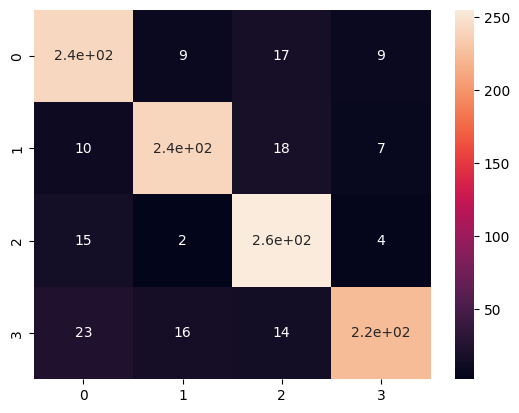

In [103]:
cm=confusion_matrix(y_test,ypred)
cm
sn.heatmap(cm,annot=True)